<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/selecting-the-best-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

In [6]:
# install.packages("leaps")
library(tidyverse)
library(leaps)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [8]:
# WRITE YOUR CODE HERE
set.seed(15)

x = rnorm(100, 0, 1)
ep = rnorm(100, 0, 1)

B0 = 2
B1 = 0.5
B2 = 1
B3 = 4

y = B0 + B1 * x + B2 * x^2 + B3 * x^3 + ep

b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [14]:
# WRITE YOUR CODE HERE
df <- as.data.frame(sapply(1:10, function(i) x^i))
colnames(df) <- paste0("X", 1:10)
df$y <- y

regfit.full = regsubsets(y ~ ., data = df)
reg.summary = summary(regfit.full)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(y ~ ., data = df)
10 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         X1  X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 ) " " " " "*" " " " " " " " " " " " " " "
2  ( 1 ) " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 ) " " "*" "*" " " " " "*" " " " " " " " "
4  ( 1 ) "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 ) "*" "*" "*" " " "*" "*" " " " " " " " "
6  ( 1 ) "*" " " "*" "*" " " "*" " " "*" " " "*"
7  ( 1 ) " " " " "*" "*" "*" "*" " " "*" "*" "*"
8  ( 1 ) " " "*" "*" "*" " " "*" "*" "*" "*" "*"

In [15]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# Subset selection object
# Call: regsubsets.formula(y ~ ., data = df)
# 10 Variables  (and intercept)
#    Forced in Forced out
# X1      FALSE      FALSE
# X2      FALSE      FALSE
# X3      FALSE      FALSE
# X4      FALSE      FALSE
# X5      FALSE      FALSE
# X6      FALSE      FALSE
# X7      FALSE      FALSE
# X8      FALSE      FALSE
# X9      FALSE      FALSE
# X10     FALSE      FALSE
# 1 subsets of each size up to 8
# Selection Algorithm: exhaustive
#          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10
# 1  ( 1 ) " " " " "*" " " " " " " " " " " " " " "
# 2  ( 1 ) " " "*" "*" " " " " " " " " " " " " " "
# 3  ( 1 ) " " "*" "*" " " " " "*" " " " " " " " "
# 4  ( 1 ) "*" "*" "*" " " " " "*" " " " " " " " "
# 5  ( 1 ) "*" "*" "*" " " "*" "*" " " " " " " " "
# 6  ( 1 ) "*" " " "*" "*" " " "*" " " "*" " " "*"
# 7  ( 1 ) " " " " "*" "*" "*" "*" " " "*" "*" "*"
# 8  ( 1 ) " " "*" "*" "*" " " "*" "*" "*" "*" "*"

```

ERROR: Error in parse(text = input): attempt to use zero-length variable name


c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model.

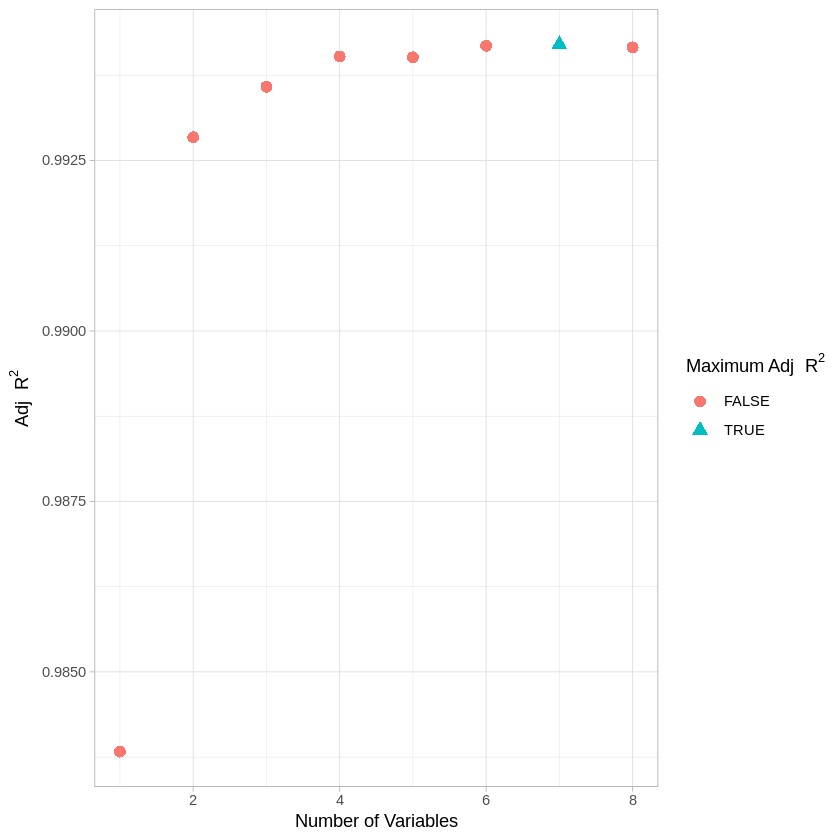

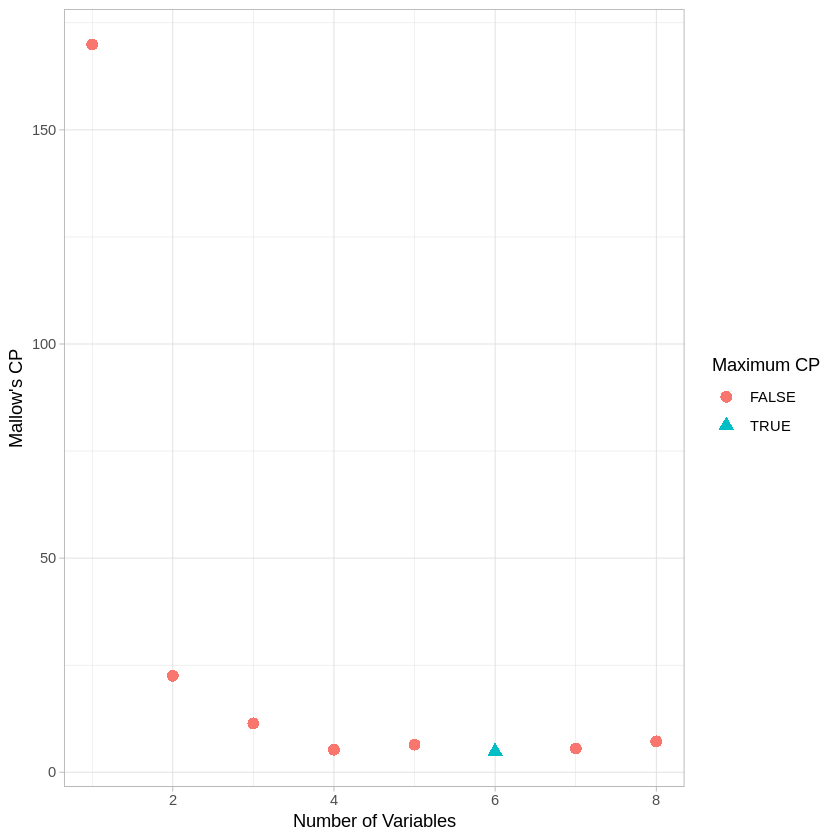

(Intercept)          X1          X2          X3          X6 
 1.56961161  0.53196689  1.50086631  3.99080549 -0.01730072

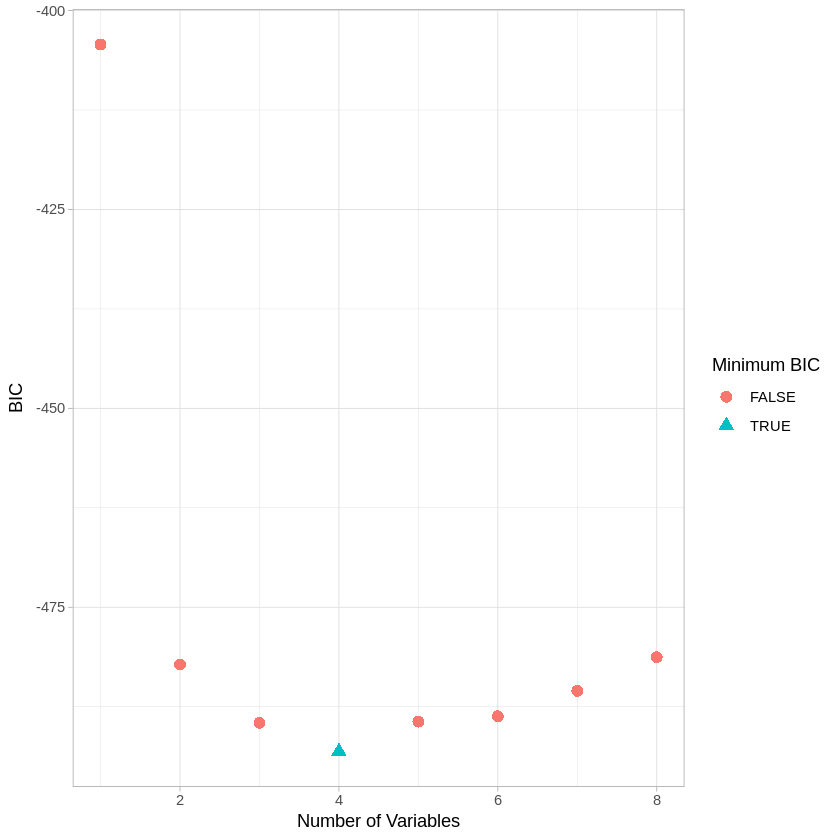

In [17]:
# WRITE YOUR CODE HERE
numvar = 1:length(reg.summary$rss)
allfalse = rep(FALSE,length(reg.summary$rss))
#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
 cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
 cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
 ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

 #bic
 bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
 bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
 ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

coef(regfit.full, 4)

> *(Intercept) 1.56961161203453 X1 0.531966891255478 X2 1.50086631230804 X3 3.99080549198353 X6 -0.0173007238063713*
>

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model.

a) Forward stepwise selection:

Subset selection object
Call: regsubsets.formula(y ~ ., data = df, method = "forward", nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  " " "*" "*" " " " " "*" " " " " " " " "
4  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 )  "*" "*" "*" " " "*" "*" " " " " " " " "
6  ( 1 )  "*" "*" "*" " " "*" "*" "*" " " " " " "
7  ( 1 )  "*" "*" "*" " " "*" "*" "*" " " "*" " "
8  ( 1 )  "*" "*" "*" " " "*" "*" "*" "*" "*" " "
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" "*" " "
10  ( 1 ) "*" "*" "*" "*" "*" "*" "

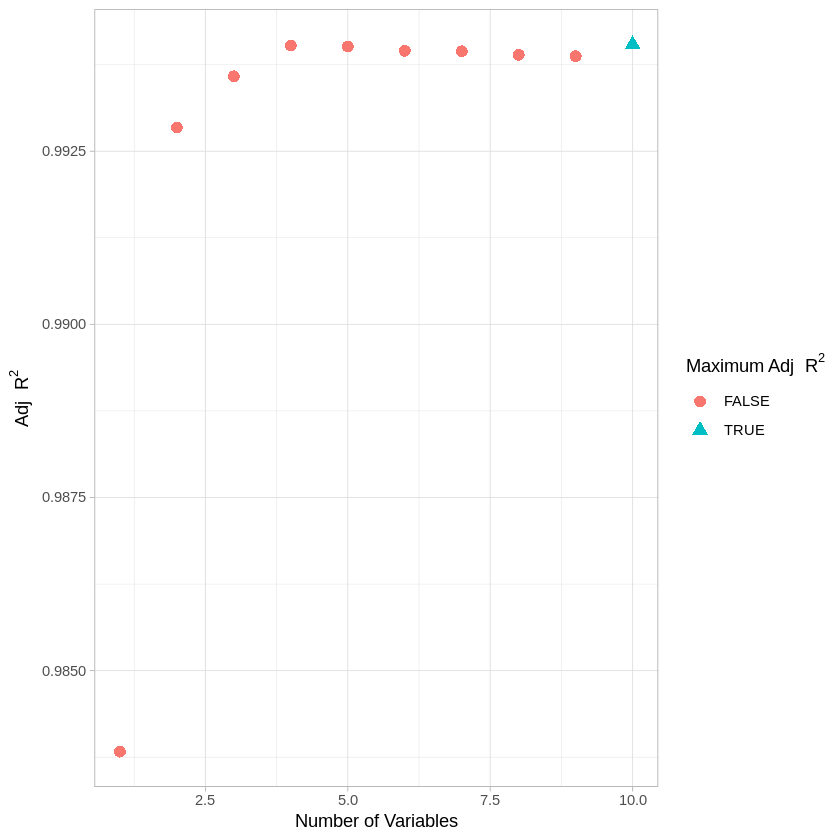

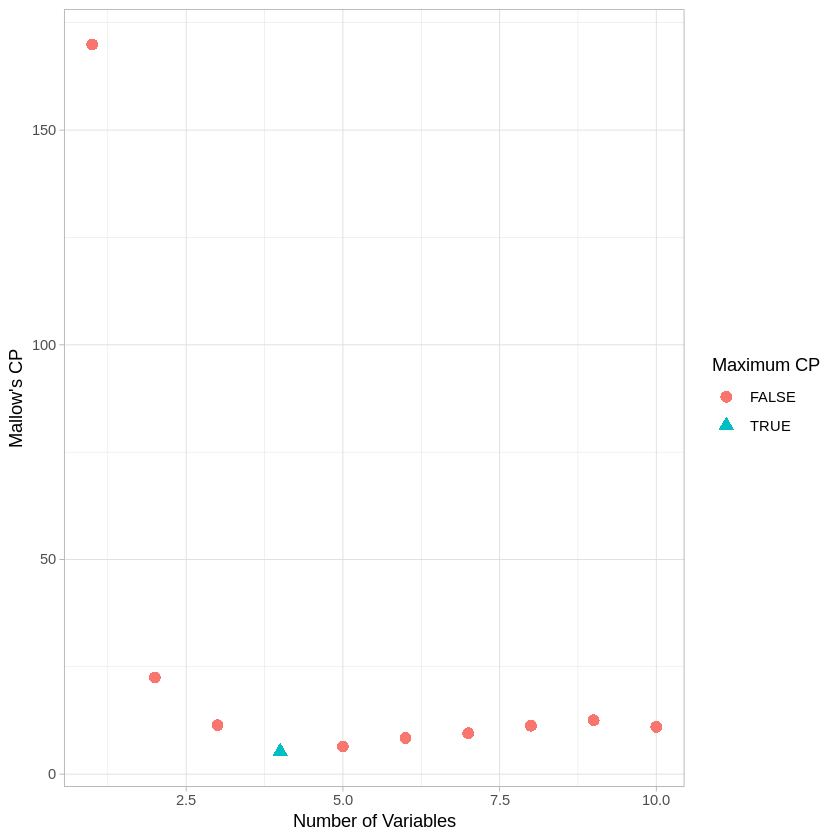

(Intercept)          X1          X2          X3          X6 
 1.56961161  0.53196689  1.50086631  3.99080549 -0.01730072

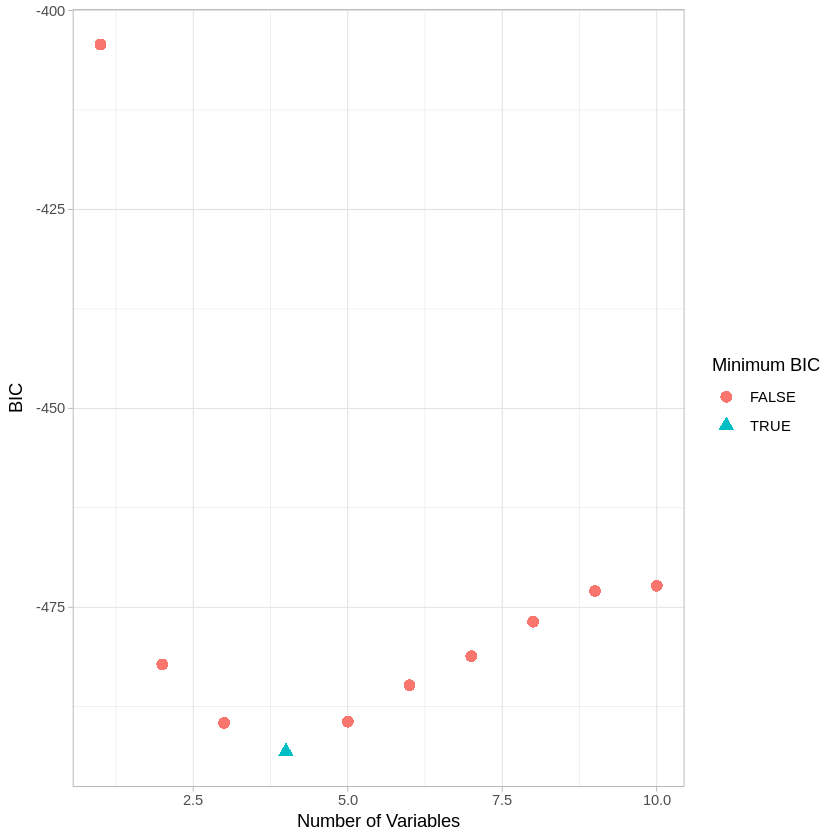

In [27]:
# WRITE YOUR CODE HERE
regfit.fwd <- regsubsets(y ~ ., data = df, method = "forward", nvmax = 10)
summary_fwd <- summary(regfit.fwd)
summary_fwd

numvar = 1:length(summary_fwd$rss)
allfalse = rep(FALSE,length(summary_fwd$rss))
#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- summary_fwd$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(summary_fwd$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
 cp.df <- data.frame(numvar = numvar, cp <- summary_fwd$cp, mincp <- allfalse)
 cp.df$mincp[which.min(summary_fwd$cp)] <- TRUE
 ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

 #bic
 bic.df <- data.frame(numvar = numvar,bic <- summary_fwd$bic, minbic <- allfalse)
 bic.df$minbic[which.min(summary_fwd$bic)] <- TRUE
 ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

coef(regfit.fwd, 4)
  # (Intercept) 1.56961161203453 X1 0.531966891255474 X2 1.50086631230804 X3 3.99080549198353 X6 -0.0173007238063712

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# Subset selection object
Call: regsubsets.formula(y ~ ., data = df, method = "forward", nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  " " "*" "*" " " " " "*" " " " " " " " "
4  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 )  "*" "*" "*" " " "*" "*" " " " " " " " "
6  ( 1 )  "*" "*" "*" " " "*" "*" "*" " " " " " "
7  ( 1 )  "*" "*" "*" " " "*" "*" "*" " " "*" " "
8  ( 1 )  "*" "*" "*" " " "*" "*" "*" "*" "*" " "
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" "*" " "
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

```

b) Backwards stepwise selection:

Subset selection object
Call: regsubsets.formula(y ~ ., data = df, method = "backward", nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " " " "*" "*" " " " " " " " " " " " "
3  ( 1 )  " " " " "*" "*" " " "*" " " " " " " " "
4  ( 1 )  " " " " "*" "*" " " "*" " " "*" " " " "
5  ( 1 )  " " " " "*" "*" " " "*" "*" "*" " " " "
6  ( 1 )  " " " " "*" "*" " " "*" "*" "*" " " "*"
7  ( 1 )  " " " " "*" "*" " " "*" "*" "*" "*" "*"
8  ( 1 )  " " "*" "*" "*" " " "*" "*" "*" "*" "*"
9  ( 1 )  "*" "*" "*" "*" " " "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*"

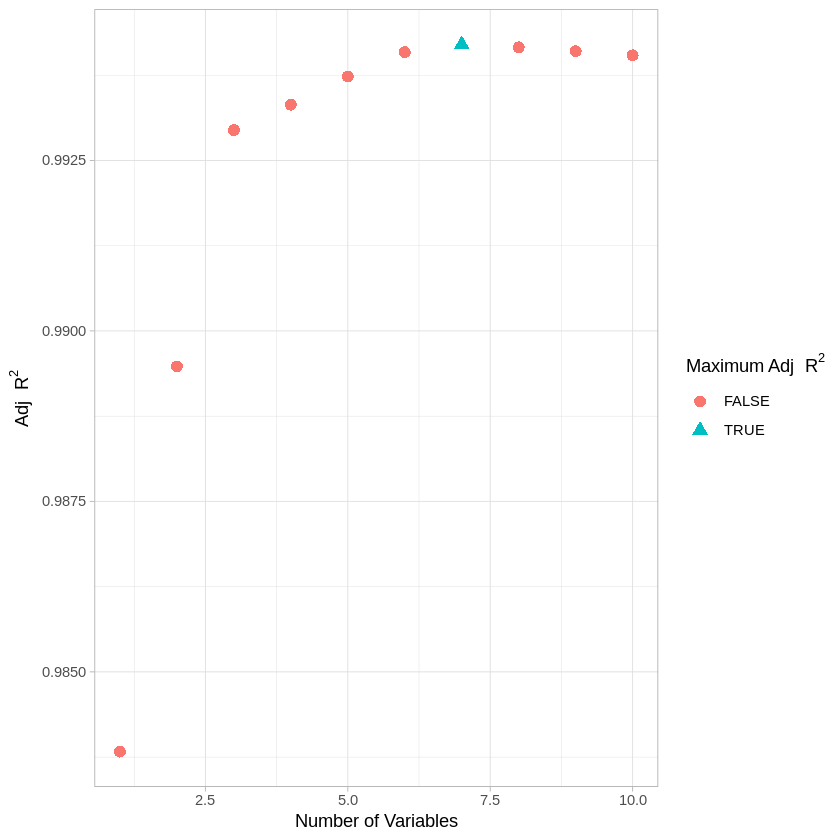

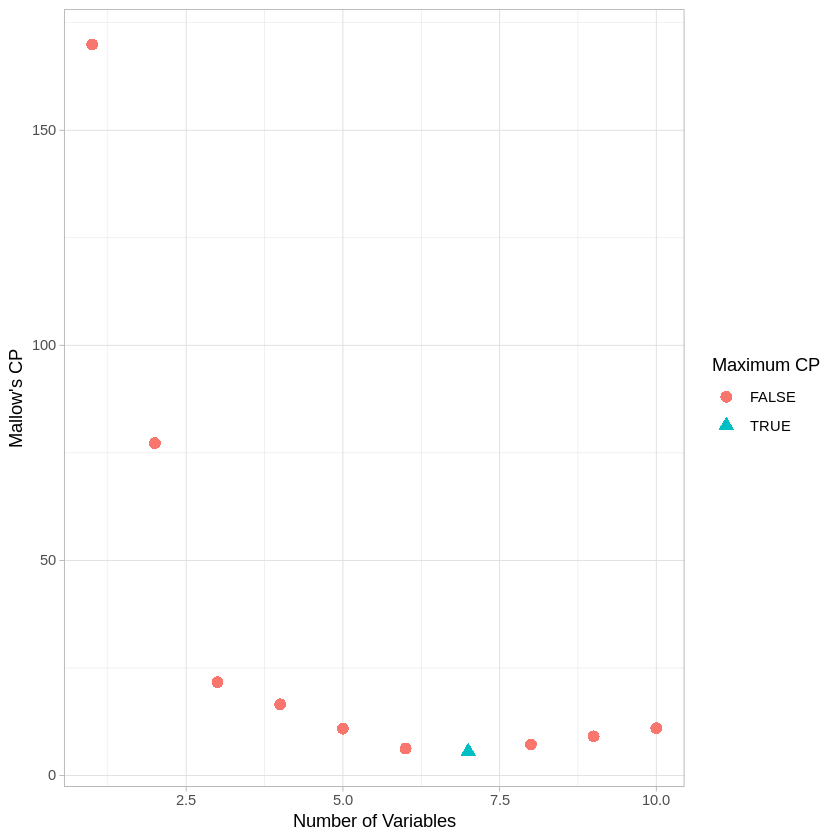

(Intercept)           X3           X4           X6           X7           X8 
 1.672744381  4.544184197  2.773878027 -1.690968461 -0.065564550  0.387309260 
          X9          X10 
 0.008836957 -0.029764995

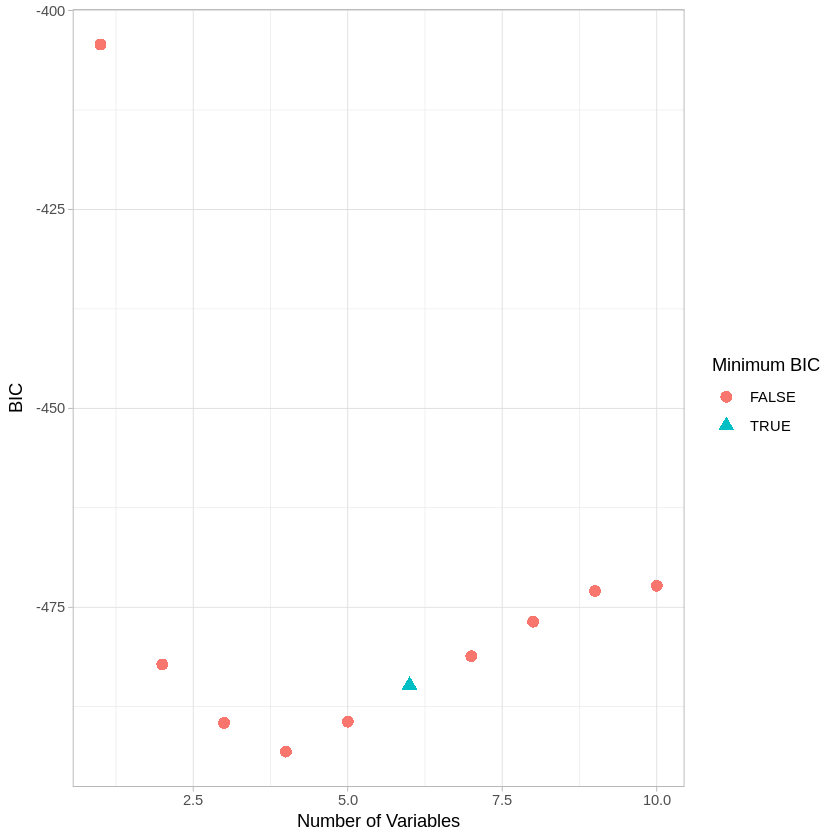

In [28]:
# WRITE YOUR CODE HERE
regfit.bwd <- regsubsets(y ~ ., data = df, method = "backward", nvmax = 10)
summary_bwd <- summary(regfit.bwd)
summary_bwd

numvar = 1:length(summary_bwd$rss)
allfalse = rep(FALSE,length(summary_bwd$rss))
#adjr2
adjr2.df = data.frame(numvar = numvar, adjr2 <- summary_bwd$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(summary_bwd$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
 cp.df = data.frame(numvar = numvar, cp <- summary_bwd$cp, mincp <- allfalse)
 cp.df$mincp[which.min(summary_bwd$cp)] <- TRUE
 ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

 #bic
 bic.df = data.frame(numvar = numvar,bic <- summary_fwd$bic, minbic <- allfalse)
 bic.df$minbic[which.min(summary_bwd$bic)] <- TRUE
 ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

coef(regfit.bwd, 7)
  # (Intercept) 1.67274438132561 X3 4.54418419675201 X4 2.77387802671705 X6 -1.69096846126908 X7 -0.0655645504726935 X8 0.387309260311736 X9 0.00883695686345647 X10 -0.0297649954844579


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# Subset selection object
Call: regsubsets.formula(y ~ ., data = df, method = "backward", nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " " " "*" "*" " " " " " " " " " " " "
3  ( 1 )  " " " " "*" "*" " " "*" " " " " " " " "
4  ( 1 )  " " " " "*" "*" " " "*" " " "*" " " " "
5  ( 1 )  " " " " "*" "*" " " "*" "*" "*" " " " "
6  ( 1 )  " " " " "*" "*" " " "*" "*" "*" " " "*"
7  ( 1 )  " " " " "*" "*" " " "*" "*" "*" "*" "*"
8  ( 1 )  " " "*" "*" "*" " " "*" "*" "*" "*" "*"
9  ( 1 )  "*" "*" "*" "*" " " "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

```

c) Compare your results from parts a and b with those of question 1.

> *Closer concensus for backward stepwise about the ideal number of variables compared to either the forward stepwise or the exhaustive version of model selection.*
>

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset.

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [31]:
# WRITE YOUR CODE HERE

set.seed(42)


n = 1000
p = 20
x = matrix(rnorm(n * p), nrow = n, ncol = p)

b = rnorm(p)
b[sample(1:p, 5)] = 0

ep = rnorm(n)

y <- x %*% b + ep

train_indices <- sample(1:n, 100)
test_indices <- setdiff(1:n, train_indices)

X_train <- x[train_indices, ]
Y_train <- y[train_indices]
X_test <- x[test_indices, ]
Y_test <- y[test_indices]

dim(X_train)
dim(X_test)

[1] 100  20

[1] 900  20

[1] 100

[1] 900

b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

Subset selection object
Call: regsubsets.formula(y ~ ., data = train_df, nvmax = p)
20 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
X11     FALSE      FALSE
X12     FALSE      FALSE
X13     FALSE      FALSE
X14     FALSE      FALSE
X15     FALSE      FALSE
X16     FALSE      FALSE
X17     FALSE      FALSE
X18     FALSE      FALSE
X19     FALSE      FALSE
X20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10 X11 X12 X13 X14 X15 X16 X17
1  ( 1 )  " " " " " " " " " " " " " " "*" " " " " " " " " " " " " " " " " " "
2  ( 1 )  " " " " " " " " " " " " " " "*" " " " " " " " " " " " " "*" " " " "
3  ( 1 )  " " " " " " " " " " " " " " "*" " " " " " " " " " " "

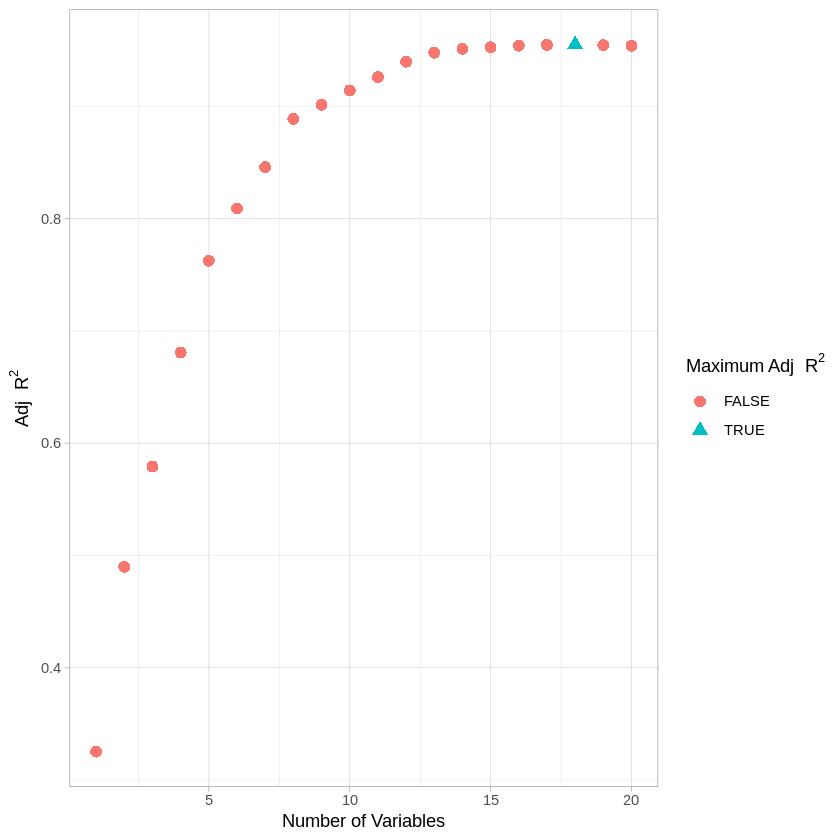

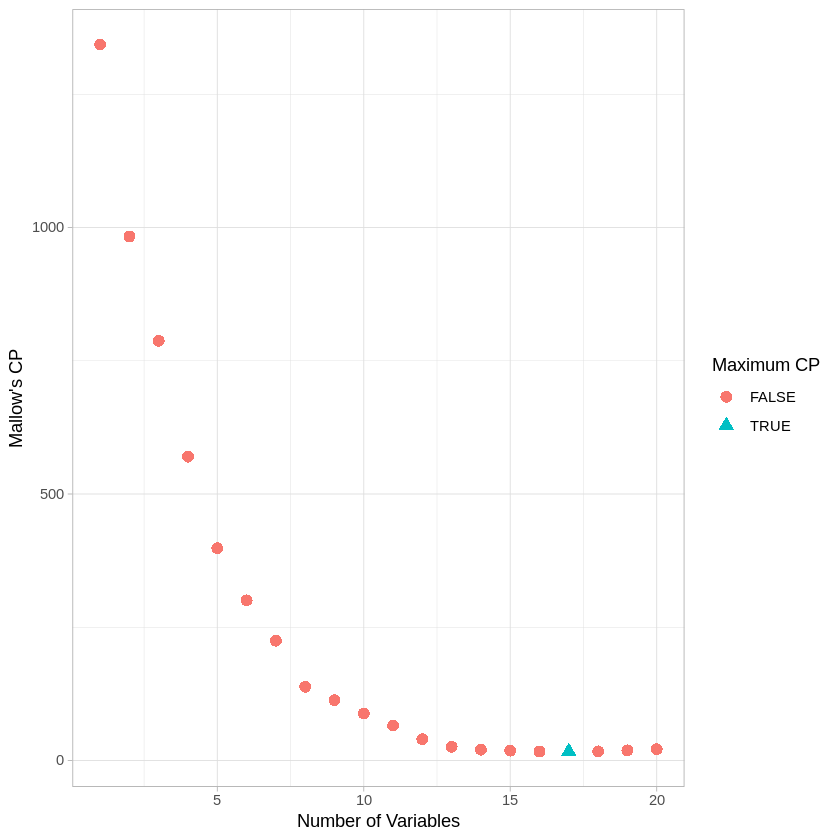

(Intercept)          X4          X5          X6          X8          X9 
 -0.2800935   0.7596556   0.8484645  -0.2412102   1.7683543   0.5420181 
        X10         X11         X13         X14         X15         X16 
 -0.4568418  -0.1666456  -0.5031835   1.5898846  -2.0059131   1.3683229 
        X17         X18         X19         X20 
 -0.4946047   0.9096319   0.2859468   0.9025375

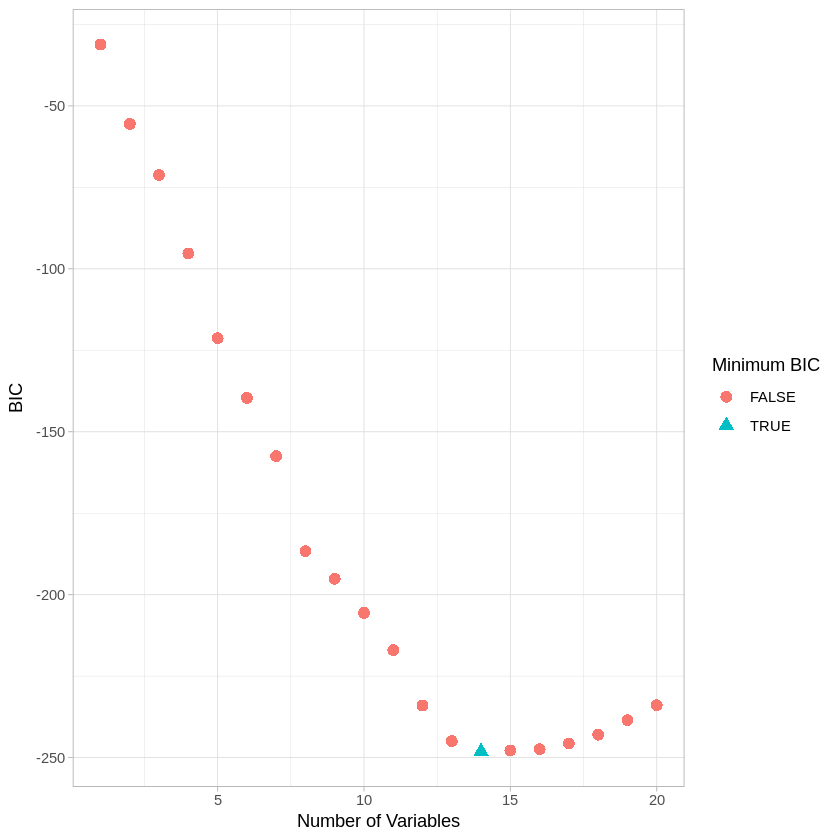

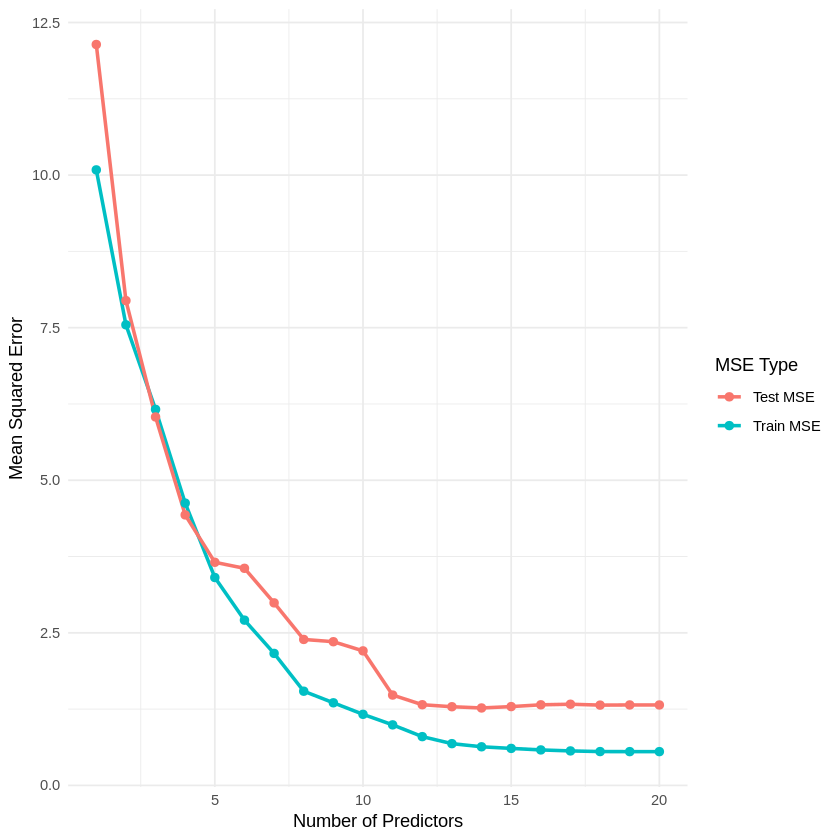

In [38]:
# WRITE YOUR CODE HERE
train_df = data.frame(y = Y_train, X_train)

best_subset = regsubsets(y ~ ., data = train_df, nvmax = p)
sub.summary = summary(best_subset)
sub.summary

numvar = 1:length(sub.summary$rss)
allfalse = rep(FALSE,length(sub.summary$rss))
#adjr2
adjr2.df = data.frame(numvar = numvar, adjr2 <- sub.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(sub.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
 cp.df = data.frame(numvar = numvar, cp <- sub.summary$cp, mincp <- allfalse)
 cp.df$mincp[which.min(sub.summary$cp)] <- TRUE
 ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

 #bic
 bic.df = data.frame(numvar = numvar,bic <- sub.summary$bic, minbic <- allfalse)
 bic.df$minbic[which.min(sub.summary$bic)] <- TRUE
 ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

coef(best_subset, 15)
  # (Intercept)-0.280093488283251X40.75965555236532X50.848464460062799X6-0.241210165642034X81.76835427292887X90.542018092214975X10-0.456841804885829X11-0.166645556319779X13-0.503183533830753X141.58988457717813X15-2.00591307507838X161.36832289841168X17-0.494604694556283X180.909631906823279X190.285946845802263X200.902537509736889
colnames(X_test) <- colnames(X_train)

test_df = data.frame(X_test)
test_mat = model.matrix(~ ., data = test_df)



train_mse = sapply(1:p, function(i) {
  coef_i = coef(best_subset, id = i)
  pred_train = train_mat[, names(coef_i)] %*% coef_i
  mean((Y_train - pred_train)^2)
})

test_mse = sapply(1:p, function(i) {
  coef_i = coef(best_subset, id = i)
  pred_test = test_mat[, names(coef_i)] %*% coef_i
  mean((Y_test - pred_test)^2)
})

mse_df = data.frame(
  ModelSize = 1:p,
  TrainMSE = train_mse,
  TestMSE = test_mse
)


ggplot(mse_df, aes(x = ModelSize)) + geom_line(aes(y = TrainMSE, color = "Train MSE"), linewidth = 1) + geom_line(aes(y = TestMSE, color = "Test MSE"), linewidth = 1) + geom_point(aes(y = TrainMSE, color = "Train MSE"), size = 2) +
  geom_point(aes(y = TestMSE, color = "Test MSE"), size = 2) + theme_minimal() + labs(
    x = "Number of Predictors",
    y = "Mean Squared Error",
    color = "MSE Type"
  )

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [39]:
# WRITE YOUR CODE HERE

which.min(test_mse)

[1] 14

> *Pretty well, there 5 useless predictors so 15 of them were meaningful and this test set identified 14 as best. *
>

**DUE:** 5pm EST, April 7, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*